In [287]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
import cv2

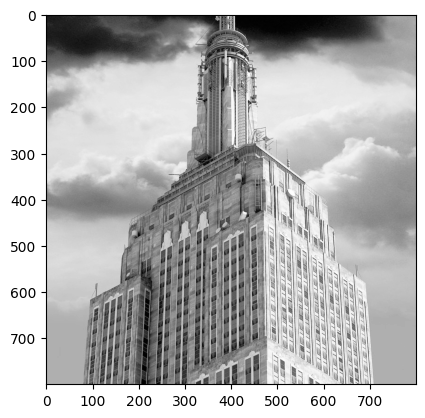

In [288]:

mpl_im = mpimg.imread('Images/empire.jpg')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.299, 0.587, 0.114])
               
gray = rgb2gray(mpl_im)

# 绘制灰度图像
plt.imshow(gray,cmap ="Greys_r")
plt.show()

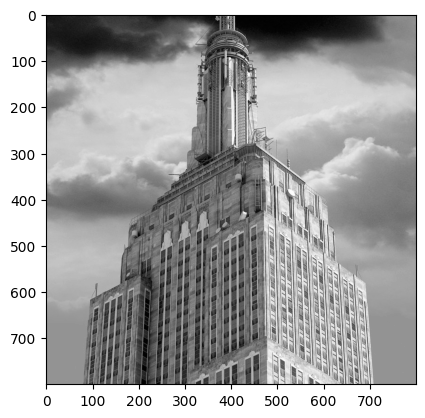

In [289]:

#返回值pil_im是一个PIL图像对象
pil_im = Image.open('Images/empire.jpg',mode="r")     
# 绘制彩色图像
plt.imshow(pil_im)
# 绘制灰度图像
plt.imshow(pil_im.convert('L'))
plt.show()


In [290]:
# 转换图像格式
import os
filelist = ["Images/empire.jpg"]
for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".png"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print ("Can not convert" ), infile



In [291]:
# 复制和粘贴图像区域
box = (100,100,800,800)             #（左，上，右，下）         左上坐标需保持一致 右下坐标需保持一致 
region = pil_im.crop(box)           #裁剪指定区域 从对角点为（100，100） 到 （400， 400）的矩形区域
#region.show()
region = region.transpose(Image.ROTATE_180)
#pil_im.paste(region,box)
#pil_im.show()

In [292]:
#调整大小和旋转方向
out = pil_im.resize((128,128)).rotate(180)
#out.show()

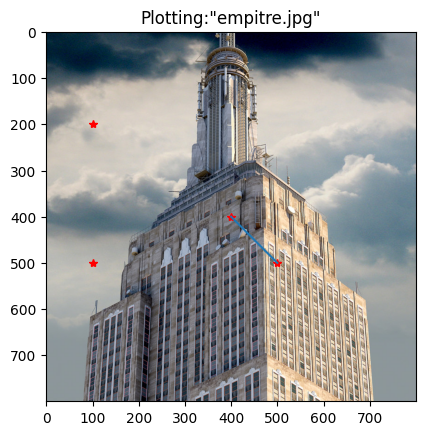

In [293]:
from pylab import *
im = array(Image.open('Images/empire.jpg'))
imshow(im)
x = [100,100,400,500]
y = [200,500,400,500]

plot(x,y,'r*')
plot(x[2:4],y[2:4])
title('Plotting:"empitre.jpg"')
show()

[[ 24.  24.  24. ... 145. 143. 141.]
 [ 22.  21.  22. ... 142. 143. 143.]
 [ 21.  21.  22. ... 140. 142. 145.]
 ...
 [148. 148. 148. ... 148. 148. 148.]
 [149. 149. 149. ... 148. 148. 148.]
 [151. 151. 151. ... 148. 148. 148.]]
(800, 800) float32


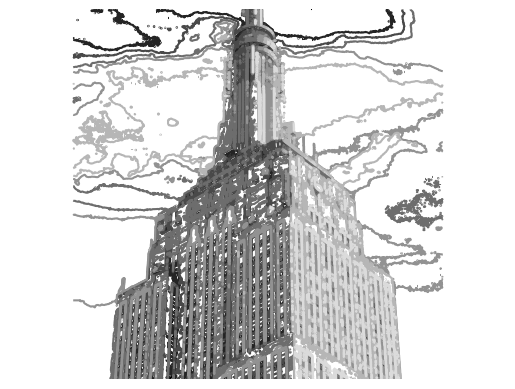

In [294]:
img = array(Image.open('Images/empire.jpg').convert('L'),'f')
figure()                        # 新建一个图像
gray()
contour(img,origin = 'image')
axis('equal')
axis('off')
print(img)
print (img.shape,img.dtype)

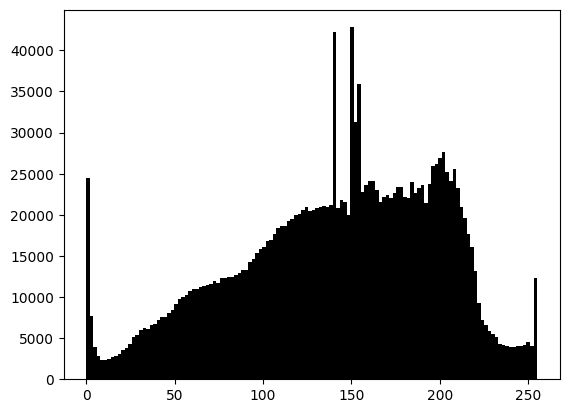

In [295]:

figure()                                                 #创建一个figure对象
hist(im.flatten(),128,color='black')                     #灰度图像直方图
show()

In [296]:
## 照片堆栈:是为了把多张照片拼凑到一起 
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    print(rows,cols)
    rowsAvailable = isinstance(imgArray[0], list)           # 判断imgArray[0]是不是一个list
    width = imgArray[0][0].shape[1]                         # imgArray[0][0] 是指在二维矩阵中位于（0，0）位置的图片也就是第一个图片
    height = imgArray[0][0].shape[0]                        # shape[1]就是width 列标，shape[0]就是height 行标
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:   # 判断前后两个图像形状是否一致，若一致则进行等比例放缩，否则先resize再放缩
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:               
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)        #如果是灰度图，则变成RGB图像
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

[ 2 29 56]


/var/folders/l9/f9rjm65s07bdf55y5xyk9f2c0000gn/T/ipykernel_4078/2318743509.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)           # 占据第一个位置
/var/folders/l9/f9rjm65s07bdf55y5xyk9f2c0000gn/T/ipykernel_4078/2318743509.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,3)           # 占据第三个位置


<Figure size 640x480 with 0 Axes>

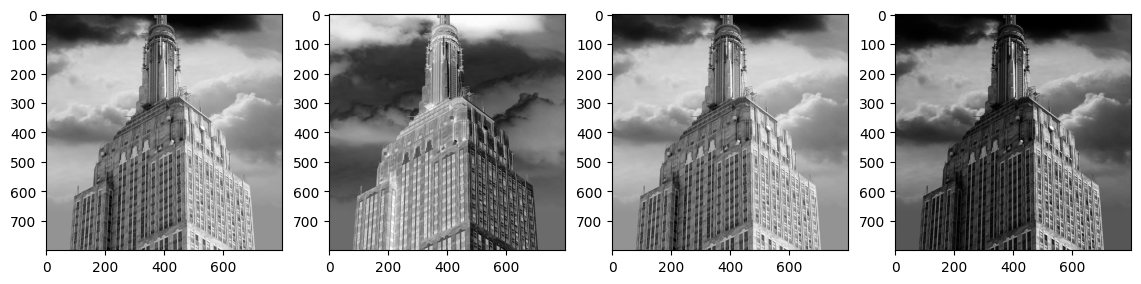

In [297]:

value = im[0,0,:]            # 原图中位于（0，0）位置像素点的rbg值如下
print(value)
im = array(Image.open('Images/empire.jpg').convert('L'))
im2 = 255-im                 # 对图像进行反相处理
im3 = (100/255) *im  + 100   # 将图像像素值变换到100...200区间
im4 = 255.0*(im/255)**2      # 对图像像素值求平方后得到的图像

figure()
fig, axs = plt.subplots(2, 2, figsize=(14,14))          # 创建2X2的网格，其中每个子图大小为14X14 英寸：
plt.subplot(1,4,1)           # 占据第一个位置
plt.imshow(im)

plt.subplot(1,4,2)           # 占据第二个位置
plt.imshow(im2)

plt.subplot(1,4,3)           # 占据第三个位置
plt.imshow(im3)

plt.subplot(1,4,4)           # 占据第一个位置
plt.imshow(im4)